<a href="https://colab.research.google.com/github/shouldbe108/Cancer_Detection_ML_Project/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [2]:
#import libraries
import pandas as pd
import seaborn as sns

Donwload dataset from kaggle

In [3]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME']='pran1011879'
os.environ['KAGGLE_KEY']='9b303a8f5ddc8a77e37d66b7c4fedd95'


In [4]:
#donwload dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data #! is for running command line script

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 2.12MB/s]


In [5]:
#unzip file because it is in .zip format in the files sections
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


Load and explore the data

In [6]:
#load data on dataframe -> 2d data structure where data is aligned in rows and column
df = pd.read_csv('/content/data.csv') #read_csv is a pandas function to read csv files

In [7]:
#display default first 5 rows of dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#count the rows and columns in df
df.shape

(569, 33)

In [9]:
#count null and empty values
df.isna().sum() #isna detects the na values and sum sums it up to give total values for each of the columns! so you can club functions together like lego bricks


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
#drop the column with null values
df.dropna(axis=1, inplace=True) #axis 1 is column. inplace as true- updates dat frame to drop the column

In [11]:
#again count the number of rows and columns
df.shape #the number of columns should be less. unnamed column should be gone.

(569, 32)

In [12]:
#get number of m or b celss in diagnosis
df['diagnosis'].value_counts() #it will give a count of different values in a given column. the sum total of each value should be the total numeber of rows.

B    357
M    212
Name: diagnosis, dtype: int64

Label Encoding: converting text labels to numerical computer readable format

In [13]:
#get datatypes of each column in our datasets
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [14]:
#we observe that except all. diagnosis column is a text (object). it needs to be converted to numerical value as numerical values are machine readable.

In [15]:
#encode teh diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() #create an object called label encoder
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values) #use fit transform to convert the object to numerical. :,1 :-> all row values. 1 is the column 1. python values start from 0.
#df.iloc[:,1].values #=> if you  run this, you ll see an array with M and B. but the previous transform statement will print an array of 1 and 0.

<ipython-input-15-6cf27e47c00f>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values) #use fit transform to convert the object to numerical. :,1 :-> all row values. 1 is the column 1. python values start from 0.


In [16]:
#display df
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
#diagnosis column depends on all other columns

Split dataset and feature scaling

In [18]:
#splitting the dataset into independent and dependent datasets
X=df.iloc[:,2:].values #independent set in array
Y=df.iloc[:,1].values #dependent set in array

In [19]:
#split dataset into training (75%) and test (25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.25) #split and assign test and train data for x and y and use 25% for testing

In [20]:
#scaling - all float values will have different range of numbers. we need to bring all these data's to the same range of numbers. a standard range.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#but why dont we SC the dependent array?

In [21]:
#print data
X_train

array([[ 9.32678150e-01,  7.26957460e-01,  9.60030556e-01, ...,
         6.20634257e-01,  2.81442160e-01, -5.00226664e-01],
       [-7.04089748e-01, -1.01673723e+00, -6.93340355e-01, ...,
        -5.69914225e-01,  7.65695806e-02,  5.24717649e-01],
       [-1.05822861e-01,  1.31898112e+00, -1.29942249e-01, ...,
         3.18787973e-01,  9.36709218e-01, -2.48825229e-01],
       ...,
       [ 1.31929402e+00, -4.31651349e-01,  1.24643482e+00, ...,
         8.42089319e-01,  1.48856669e-04,  8.71824587e-02],
       [-6.44827462e-01,  2.85545451e-02, -6.79429291e-01, ...,
        -8.26256044e-01,  9.64350757e-01, -8.18104440e-01],
       [-9.24206810e-01,  3.24566376e-01, -8.77048234e-01, ...,
        -3.92598494e-01, -4.69757297e-01,  2.35243400e-01]])

build a logistic regression model

In [22]:
#build a logsitc regression classifier. supervised learning
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [23]:
#make use of trained model to make predictions
predictions = classifier.predict(X_test)

Performance evaluation

[[74  0]
 [11 58]]


<Axes: >

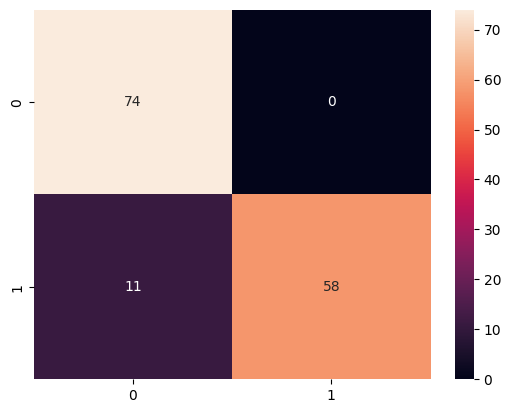

In [24]:
#plot confusion matrix

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,predictions) #compare test expected values and teh prediction values from the trained model
print(cm)
sns.heatmap(cm,annot=True)

In [25]:
#accuracy of the model on testing data
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, predictions))


0.9230769230769231


In [27]:
print(Y_test-predictions)



[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0]


https://coursera.org/share/d8a90e41ce656c69a60169764b183159